Electricity data. 7 features. 2 classes.
10 batches of 130 instances



METHOD: Static knn as classifier
Execution time:  0.022791111111111113
Average MCC:  0.528494697333
Average error: 15.77
Average macro-F1: 0.8445308939426587
Average micro-F1: 0.9100000000000001
Average Accuracy:  

C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:516: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(var_yt * var_yp)


84.23
Standard Deviation:  14.390990237
Variance:  207.1006


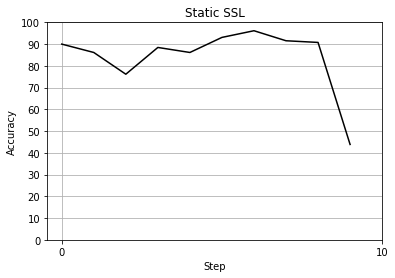

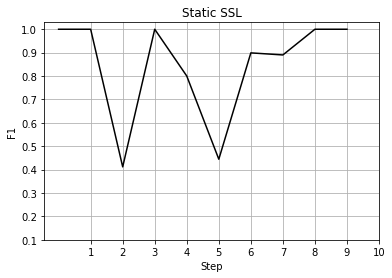

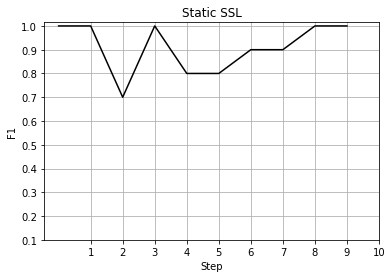




METHOD: Sliding knn as classifier
Execution time:  0.016328691358024727
Average MCC:  0.435101906475
Average error: 16.23
Average macro-F1: 0.792585295681271
Average micro-F1: 0.9
Average Accuracy:  83.77
Standard Deviation:  15.3162985085
Variance:  234.589


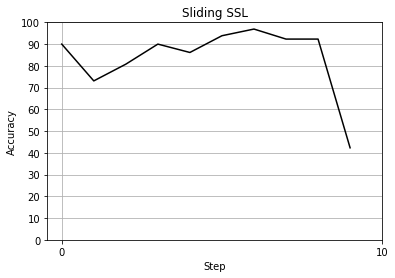

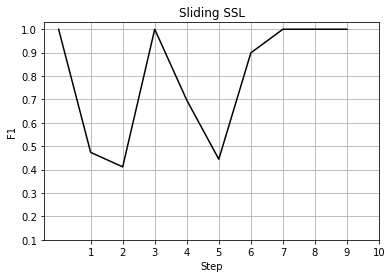

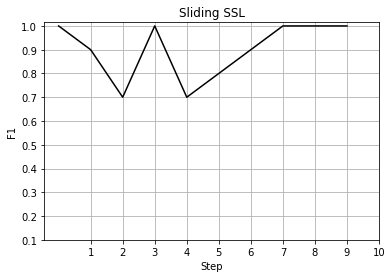




METHOD: Incremental knn as classifier
Execution time:  0.04494656790123441
Average MCC:  0.435101906475
Average error: 17.461
Average macro-F1: 0.792585295681271
Average micro-F1: 0.9
Average Accuracy:  82.539
Standard Deviation:  14.3161387602
Variance:  204.951829


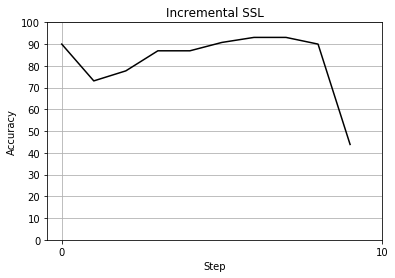

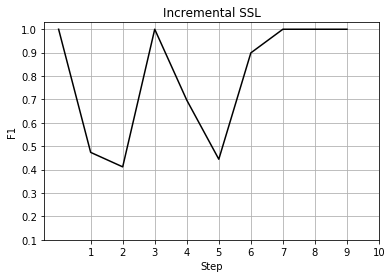

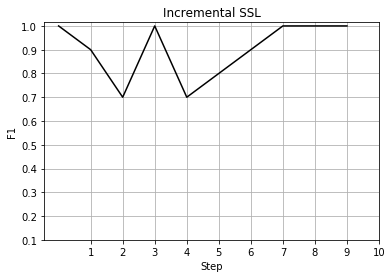




METHOD: knn as classifier and kde as core support extraction with cutting data method
Execution time:  0.048605629629629554
Average MCC:  0.463299316186
Average error: 18.539
Average macro-F1: 0.812787315883291
Average micro-F1: 0.9199999999999999
Average Accuracy:  81.461
Standard Deviation:  15.4550324814
Variance:  238.858029


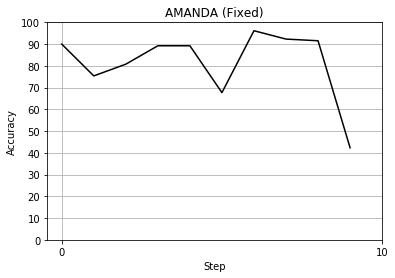

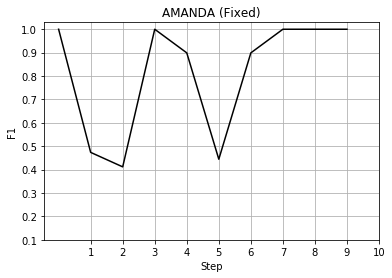

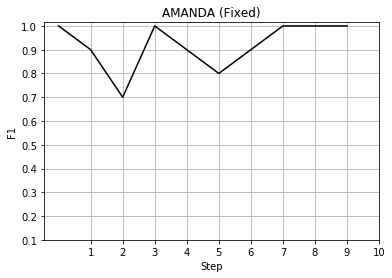




METHOD: knn as classifier and kde and Hellinger distance as dynamic CSE
Execution time:  0.0767992098765431
Average MCC:  0.406649658093
Average error: 15.538
Average macro-F1: 0.782447149513713
Average micro-F1: 0.9
Average Accuracy:  84.462
Standard Deviation:  15.7366202216
Variance:  247.641216


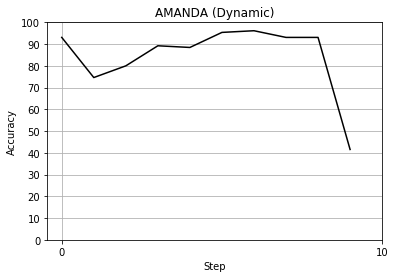

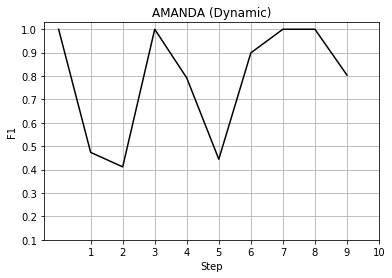

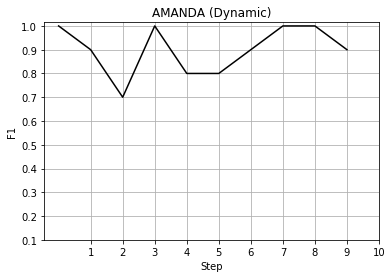




METHOD: None as classifier and GMM with BIC and Mahalanobis as core support extraction


C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Execution time:  4.725118814814814
Average MCC:  0.378494697333
Average error: 21.23
Average macro-F1: 0.6593244388910023
Average micro-F1: 0.78
Average Accuracy:  78.77
Standard Deviation:  16.4923940045
Variance:  271.99906


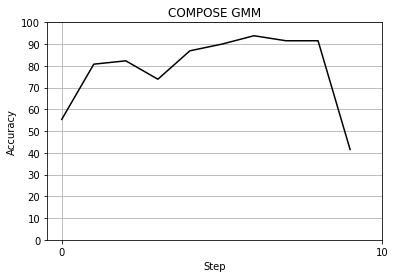

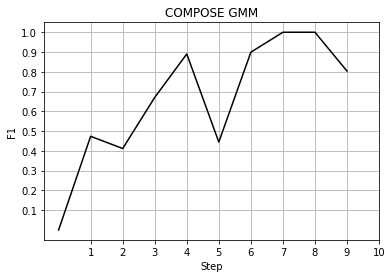

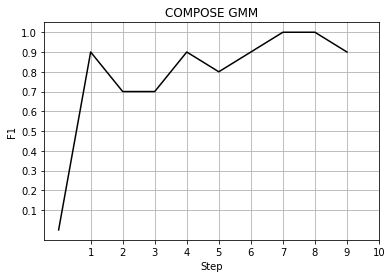

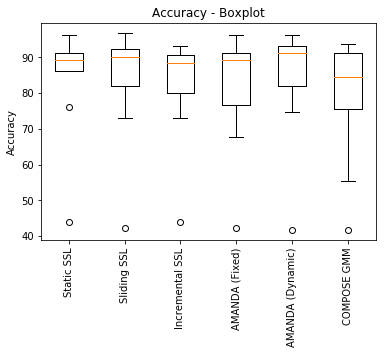

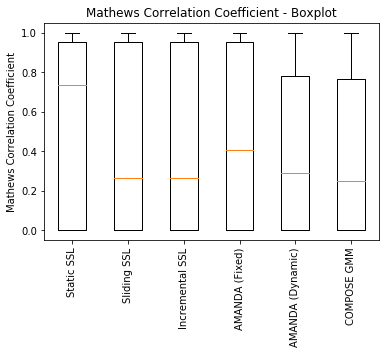

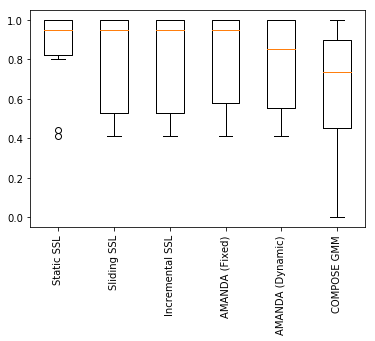

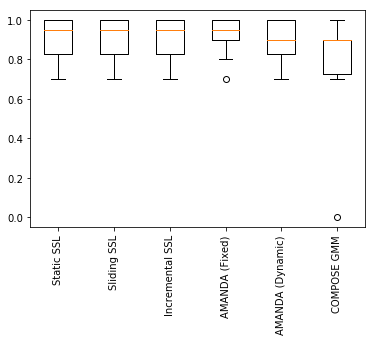

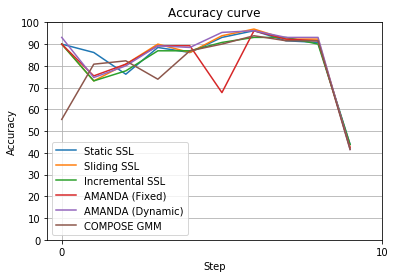

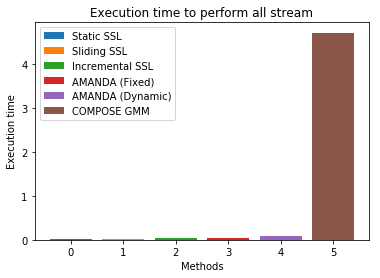

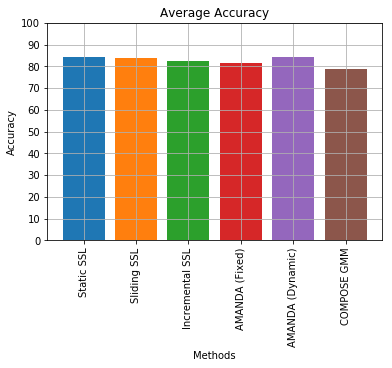

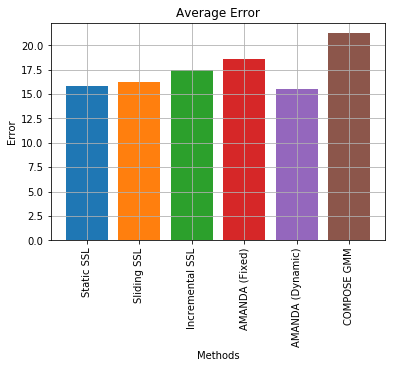

Error reduction: -0.546123708892
Error reduction: -2.00759824291
Error reduction: -3.28742728244
Error reduction: 0.275436305354
Error reduction: -6.48225097946


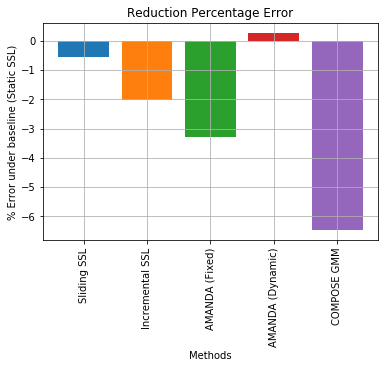

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])
import psutil
import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version
from methods import prequential_amanda_fixed
from methods import prequential_amanda_dynamic
from methods import prequential_static_classifier
from methods import prequential_deslizante_LN
from methods import prequential_incremental_LN
from methods import prequential_compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'knn' # lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = True
    isImbalanced = True
    externalResults = []
    plot_animation = False
    
    # Load dataset
    dataValues, dataLabels, description = setup.loadElecData(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))
    '''
    # Static SSL
    #experiments[0] = Experiment(static_classifier, 6, clfName=sslClassifier)
    
    # Sliding SSL
    #experiments[1] = Experiment(deslizante_LN, 6, clfName=sslClassifier)
    
    # Incremental SSL
    #experiments[2] = Experiment(incremental_LN, 6, clfName=sslClassifier)
    
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    #experiments[3] = Experiment(amanda_fixed, 6, 0.6, "kde", sslClassifier)
    
    # memory usage
    #process = psutil.Process(os.getpid())
    
    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    #experiments[4] = Experiment(amanda_dynamic, 12, None, "kde", sslClassifier)
    
    #print("Memory:", process.memory_info().rss)
    
    # COMPOSE GMM (Python version)
    #experiments[5] = Experiment(compose_gmm_version, 3)
    '''
    
    #prequential evaluation
    steps = 10
    dataValues, dataLabels = dataValues[:labeledData], dataLabels[:labeledData]
    labeledData = int(0.05*len(dataLabels))
    experiments[0] = Experiment(prequential_static_classifier, 6, clfName=sslClassifier)
    experiments[1] = Experiment(prequential_deslizante_LN, 6, clfName=sslClassifier)
    experiments[2] = Experiment(prequential_incremental_LN, 6, clfName=sslClassifier)
    experiments[3] = Experiment(prequential_amanda_fixed, 6, 0.6, "kde", sslClassifier)
    experiments[4] = Experiment(prequential_amanda_dynamic, 12, None, "kde", clfName=sslClassifier)
    experiments[5] = Experiment(prequential_compose_gmm_version, 6, 0.6)
    
    # levelIw matlab results
    predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, 'elec2', steps)
    externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw[:labeledData], "accuracies":originalAccsLevelIw[:labeledData], "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()